In [ ]:
import cv2
import numpy as np

def find_roi(image):
    # Convert the image to grayscale.
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to find the ventricles.
    threshold = 95
    binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)[1]

    # Find the contours of the ventricles.
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour, which is the ventricle.
    max_area = 0
    max_contour = None
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > max_area:
            max_area = area
            max_contour = contour

    # Return the ROI of the ventricle.
    roi = cv2.boundingRect(max_contour)
    return roi


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image = cv2.imread("/content/drive/MyDrive/Datasets/OAS1_0351_MR1_mpr-4_158.jpg")
roi = find_roi(image)
print(roi)

(98, 28, 178, 180)


In [ ]:
import cv2
import numpy as np

def slice_image(image, roi):
    # Get the coordinates of the ROI.
    x, y, w, h = roi

    # Slice the image.
    sliced_image = image[y:y+h, x:x+w]

    return sliced_image

In [ ]:
#roi = find_roi(image)
from PIL import Image
sliced_image = slice_image(image, roi)
new = Image.fromarray(sliced_image)


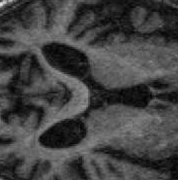

In [ ]:
new

In [ ]:
new.size

(178, 180)

In [ ]:
im = Image.fromarray(image)

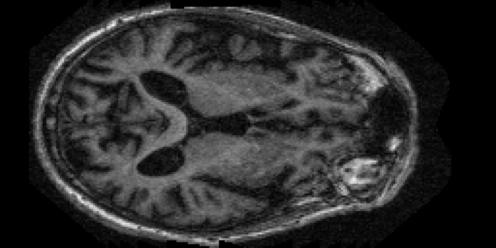

In [ ]:
im

In [ ]:
im.size

(496, 248)

In [ ]:
import cv2
import numpy as np

def calculate_curvature(image):
    # Convert the image to grayscale.
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to find the ventricles.
    threshold = 127
    binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)[1]

    # Find the contours of the ventricles.
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the curvature of the ventricles.
    curvature = []
    for contour in contours:
        radius_of_curvature = cv2.minEnclosingCircle(contour)[1]
        curvature.append(1/radius_of_curvature)

    return curvature


In [ ]:
curvature = calculate_curvature(sliced_image)


In [ ]:
import cv2
import numpy as np

def superimpose_curvature(image, curvature):
    # Create a grayscale image with black pixels representing low curvature and white pixels representing high curvature.
    gray_curvature = cv2.convertScaleAbs(curvature, alpha=255, beta=0)

    # Blend the image with the grayscale image.
    blended_image = cv2.addWeighted(image, 0.7, gray_curvature, 0.3, 0)

    return blended_image

In [ ]:
blended_image = superimpose_curvature(new, np.array(curvature))

error: ignored

In [ ]:
curvature = np.array(curvature)

In [ ]:
gray_curvature = cv2.convertScaleAbs(curvature, alpha=255, beta=0)

In [ ]:
blended_image = cv2.addWeighted(sliced_image, 0.7, gray_curvature, 0.3, 0)

In [ ]:
import cv2
import numpy as np

def detect_curvature(image):
    # Convert the image to grayscale.
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection.
    edges = cv2.Canny(gray_image, 10, 100)

    # Create a copy of the image to show the edges in red.
    red_edges = edges.copy()
    cv2.cvtColor(red_edges, cv2.COLOR_GRAY2BGR, red_edges)

    # Set the edges to red.
    color = np.array([0, 0, 255], dtype=np.uint8)
    cv2.addWeighted(red_edges, 1, color, 1, 0, red_edges)

    return red_edges

In [ ]:
sl = cv2.imread("/content/drive/MyDrive/Datasets/OAS1_0351_MR1_mpr-4_158.jpg")
gray_image = cv2.cvtColor(sl, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_image, 90, 100)
red_edges = edges.copy()
cv2.cvtColor(red_edges, cv2.COLOR_GRAY2BGR, red_edges)
color = np.array([0, 0, 255], dtype=np.uint8)
#cv2.addWeighted(red_edges, 1, color, 1, 0, red_edges)

In [ ]:
ed = Image.fromarray(edges)
ed

In [ ]:
edges.shape

In [ ]:
def sobel_edge_detection(image, dx=1, dy=1, ksize=3, scale=1, delta=0):
    # Convert the image to grayscale.
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Sobel operator.
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, dx, 0, ksize=ksize, scale=scale, delta=delta)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, dy, ksize=ksize, scale=scale, delta=delta)

    # Calculate the magnitude of the gradient.
    gradient_magnitude = np.sqrt(np.square(sobel_x) + np.square(sobel_y))

    # Threshold the gradient magnitude.
    threshold = 100
    gradient_magnitude[gradient_magnitude < threshold] = 0

    return gradient_magnitude

In [ ]:
gradient_magnitude = sobel_edge_detection(image)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(gradient_magnitude)

In [ ]:
gr = Image.fromarray(gradient_magnitude)
gr

In [ ]:
def remove_small_regions(image, min_size):
    # Find the connected components in the image.
    retval, labels, stats, _ = cv2.connectedComponentsWithStats(image)

    # Find the sizes of the connected components.
    sizes = stats[:, -1]

    # Remove the connected components that are smaller than the minimum size.
    for i in range(1, retval):
        if sizes[i] < min_size:
            labels[labels == i] = 0

    # Return the image with the smaller regions removed.
    return labels
labels = remove_small_regions(edges, 3)

In [ ]:
retval, labels, stats, _ = cv2.connectedComponentsWithStats(edges)

In [ ]:
sizes = stats[:, -1]
sizes

In [ ]:
labels = Image.fromarray(labels)
labels

In [ ]:
import cv2
import numpy as np

def calculate_volume(sliced_image):
    # Get the dimensions of the image.
    height, width = sliced_image.shape[:2]

    # Calculate the volume.
    volume = height * width * sliced_image.shape[2]

    return volume

# if __name__ == "__main__":
#     image = cv2.imread("image.jpg")
#     roi = find_roi(image)
#     sliced_image = slice_image(image, roi)
#     volume = calculate_volume(sliced_image)
#     print(volume)

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
import sys
import os
import pandas as pd
from PIL import Image, ImageEnhance
import random

In [ ]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

In [ ]:
import cv2
# import matplotlib.pyplot as plt
import numpy as np

def get_cropped_image(image_path):
    # Read the MRI image
    # image = cv2.imread("/content/drive/MyDrive/Datasets/OAS1_0351_MR1_mpr-4_158.jpg")
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, threshold = cv2.threshold(gray, 97, 100, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the largest area
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask image of the same size as the original image
    mask = np.zeros_like(gray)

    # Draw the largest contour on the mask image
    cv2.drawContours(mask, [largest_contour], 0, (255), thickness=cv2.FILLED)

    # Bitwise AND operation between the mask image and the original image
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    # Find the bounding box coordinates of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Crop the region of interest from the original image
    cropped_image = masked_image[y:y+h, x:x+w]

    return cropped_image

In [ ]:
image_path = "/content/drive/MyDrive/Datasets/OAS1_0351_MR1_mpr-4_160.jpg"
from keras.preprocessing import image
from PIL import Image

img = image.load_img(image_path, target_size=(100, 100))
# image = cv2.imread(image_path)
# plt.imshow(image)
plt.imshow(get_cropped_image(image_path))
# get_cropped_image(image_path)

AttributeError: ignored

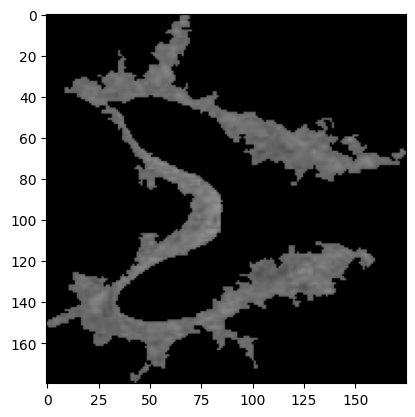

In [ ]:
image_path = "/content/drive/MyDrive/Datasets/OAS1_0351_MR1_mpr-4_158.jpg"
plt.imshow(get_cropped_image(image_path))
# get_cropped_image(image_path)

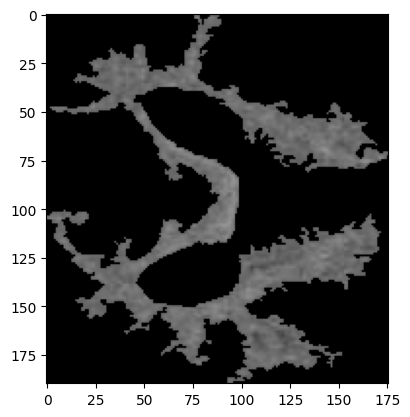

In [ ]:
image_path = "/content/drive/MyDrive/Datasets/OAS1_0351_MR1_mpr-4_156.jpg"
# image = cv2.imread(image_path)
# plt.imshow(image)
plt.imshow(get_cropped_image(image_path))
# get_cropped_image(image_path)

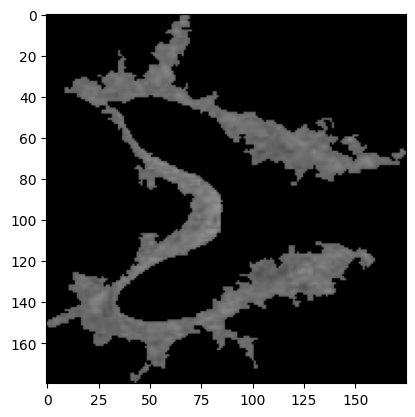

In [ ]:
image_path = "/content/drive/MyDrive/Datasets/OAS1_0351_MR1_mpr-4_158.jpg"
plt.imshow(get_cropped_image(image_path))
# get_cropped_image(image_path)

In [ ]:
images_cropped = []
for image in images:
  images_cropped += get_cropped_image(image)

NEW APPROACH

In [ ]:
from google.colab.patches import cv2_imshow

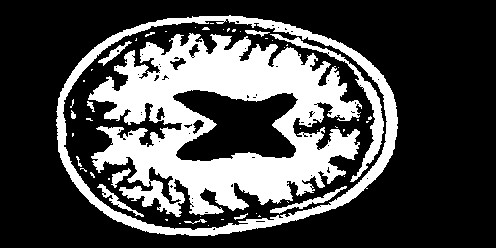

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the MRI image
image_path = "/content/drive/MyDrive/Datasets/OAS1_0001_MR1_mpr-1_150.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, threshold = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)

cv2_imshow( threshold)


# image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [11]:
plt.imshow('Original Image', image)

NameError: ignored

In [ ]:
def skull_strip_adaptive_threshold(mri_slice_path):
    # Load the MRI slice as a grayscale image
    mri_slice = cv2.imread(mri_slice_path, cv2.IMREAD_GRAYSCALE)

    # Apply Adaptive Gaussian Thresholding
    binary_brain_mask = cv2.adaptiveThreshold(mri_slice, 180, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 2)

    # # Perform morphological operations to improve the brain mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    binary_brain_mask = cv2.morphologyEx(binary_brain_mask, cv2.MORPH_CLOSE, kernel)


    dialated_mask = cv2.dilate(binary_brain_mask, kernel, iterations =1 )
    return dialated_mask
    # # Apply the brain mask to the original MRI slice
    # skull_stripped_slice = cv2.bitwise_and(mri_slice, binary_brain_mask)

    # # # Save the skull-stripped MRI slice
    # # cv2.imwrite(output_path, skull_stripped_slice)

    # return skull_stripped_slice


In [ ]:
def skull_strip_adaptive_threshold(mri_slice_path):
    # Load the MRI slice as a grayscale image
    mri_slice = cv2.imread(mri_slice_path, cv2.IMREAD_GRAYSCALE)

    # Apply Adaptive Gaussian Thresholding
    binary_brain_mask = cv2.adaptiveThreshold(mri_slice, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Perform morphological operations to improve the brain mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

    # Closing to bridge small gaps
    closed_mask = cv2.morphologyEx(binary_brain_mask, cv2.MORPH_CLOSE, kernel)

    # Iterative dilation and erosion to bridge larger gaps
    iterations = 5  # Adjust the number of iterations as needed
    dilated_mask = cv2.dilate(closed_mask, kernel, iterations=iterations)
    bridged_mask = cv2.erode(dilated_mask, kernel, iterations=iterations)

    # Apply the bridged mask to the original MRI slice
    skull_stripped_slice = cv2.bitwise_and(mri_slice, bridged_mask)

    # Save the skull-stripped MRI slice
    # cv2.imwrite(output_path, skull_stripped_slice)

    return skull_stripped_slice


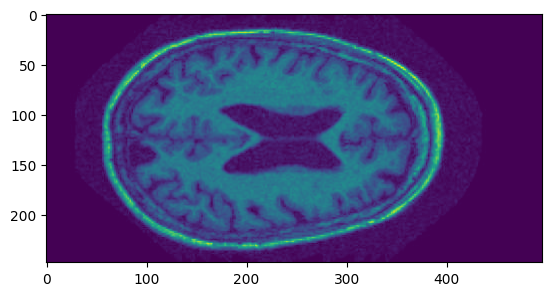

In [ ]:
input_mri_slice_path = "/content/drive/MyDrive/Datasets/OAS1_0001_MR1_mpr-1_150.jpg"
# output_skull_stripped_path = "path/to/output_skull_stripped_slice.jpg"

plt.imshow(skull_strip_adaptive_threshold(input_mri_slice_path))
# skull_strip_adaptive_threshold(input_mri_slice_path, output_skull_stripped_path)

In [ ]:
# !pip install --upgrade scikit-image


In [ ]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
# from skimage.morphology import watershed as skwater
from skimage.segmentation import watershed as skwater

def ShowImage(title,img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

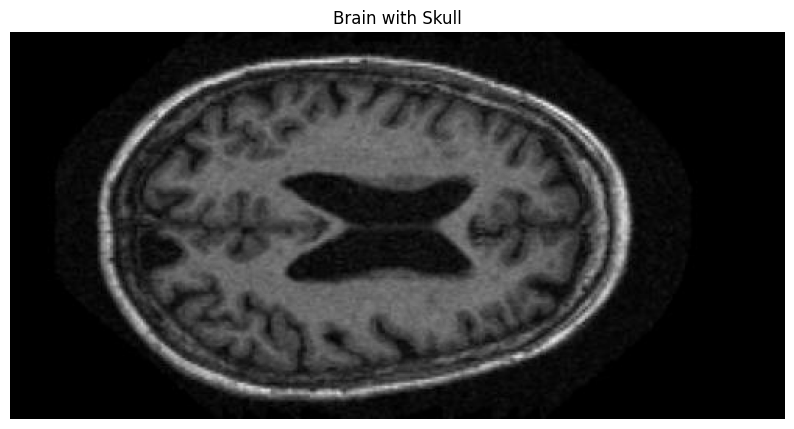

In [ ]:
img           = cv2.imread('/content/drive/MyDrive/Datasets/OAS1_0001_MR1_mpr-1_150.jpg')
gray          = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain with Skull',gray,'gray')

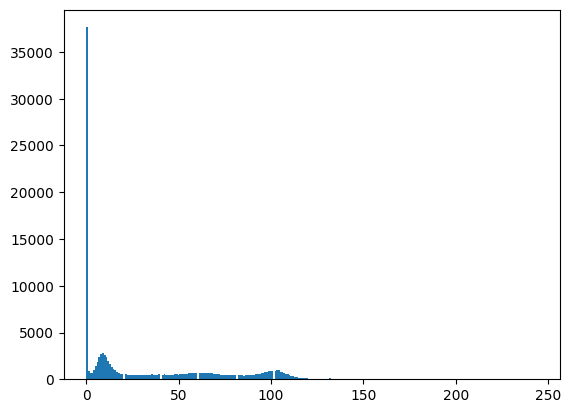

In [ ]:
#Make a histogram of the intensities in the grayscale image
plt.hist(gray.ravel(),256)
plt.show()

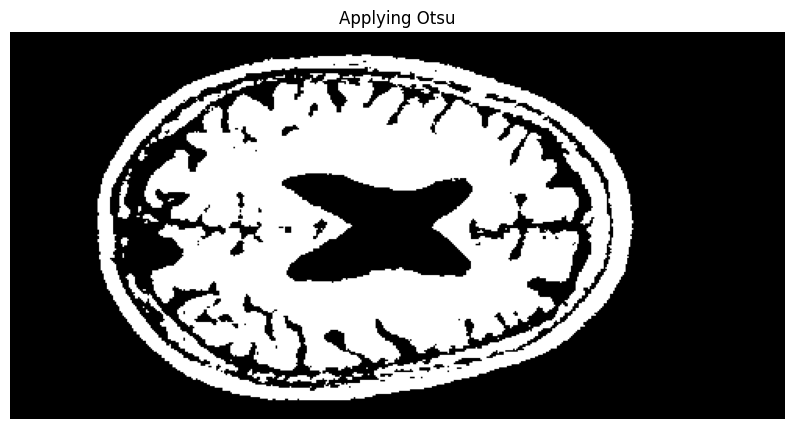

In [ ]:
#Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Applying Otsu',thresh,'gray')

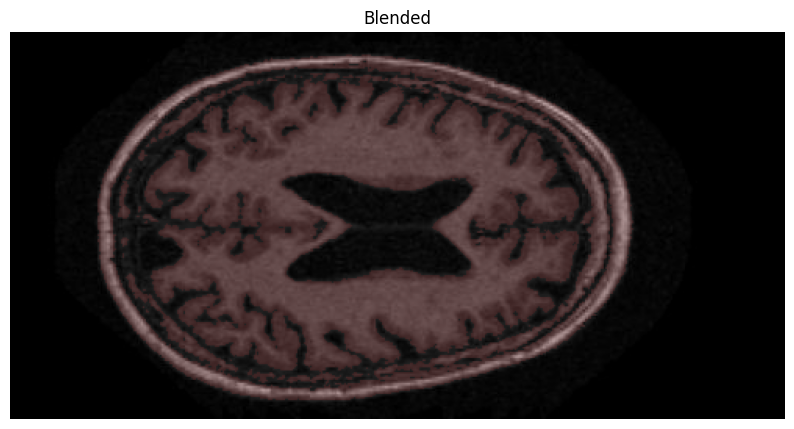

In [ ]:
colormask = np.zeros(img.shape, dtype=np.uint8)
colormask[thresh!=0] = np.array((0,0,255))
blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
ShowImage('Blended', blended, 'bgr')

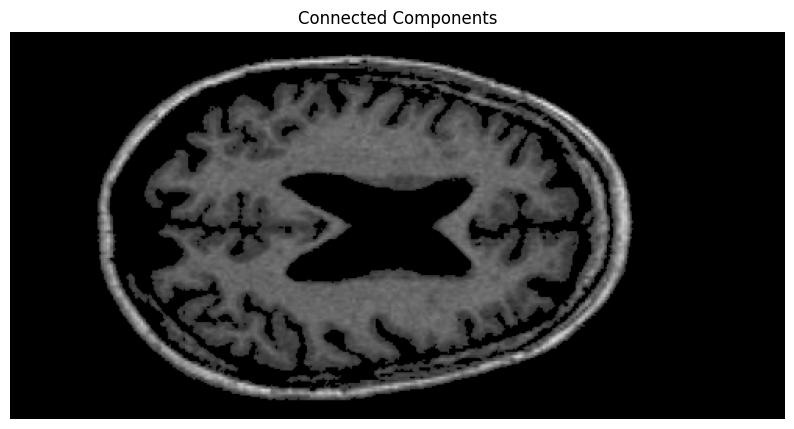

In [ ]:
ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)
ShowImage('Connected Components',brain_out,'rgb')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Path to the folder containing the image folders
data_folder = '/content/drive/MyDrive/Datasets/Alzheimers'

# List of folder names
folder_names = ['Very mild Dementia', 'Non Demented', 'Moderate Dementia', 'Mild Dementia']

# List to store the extracted images
images = []

df = pd.DataFrame(columns=['image_path', 'label'])

# Iterate over each folder
for folder_name in folder_names:
    folder_path = os.path.join(data_folder, folder_name)

    # Iterate over the files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') and '150' in file_name:
            file_path = os.path.join(folder_path, file_name)

            # Read the image using OpenCV
            image = cv2.imread(file_path)

            # Resize the image to a desired size
            resized_image = cv2.resize(image, (224, 224))

            # Convert the image to grayscale
            gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

            # Normalize the pixel values to a range of 0 to 1
            normalized_image = gray_image / 255.0

            # Reshape the image to match the input shape of the CNN model
            reshaped_image = np.reshape(normalized_image, (224, 224, 1))

            # Append the image to the list
            # images.append(reshaped_image)
            df = df.append({'image_path': file_path, 'label': label}, ignore_index=True)


image_paths = df['image_path'].tolist()
labels = df['label'].tolist()
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))

# Convert the list of images to a NumPy array
# images_array = np.array(images)

# Print the shape of the array (number of images, height, width, channels)
# print(images_array.shape)


(1897, 224, 224, 1)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create labels for the images
labels = np.array([0] * len(images_array))  # Replace 0 with the appropriate label for each class

# Split the data into training and testing sets

# Training split
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir = '/content/drive/MyDrive/Datasets/Alzheimers',
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224, 224),
    batch_size=32)

NameError: ignored

In [ ]:
# Testing or Validation split
val_ds = tf.keras.utils.image_dataset_from_directory(
	data_dir = '/content/drive/MyDrive/Datasets/Alzheimers',
	validation_split=0.2,
	subset="validation",
	seed=42,
	image_size=(224,224),
	batch_size=32)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

vgg_model = VGG16(weights='imagenet')

553467096/553467096 [==============================] - 7s 0us/step


In [ ]:
# !pip install --upgrade tensorflow

In [ ]:
# Define the CNN model
# model = keras.Sequential([
#     layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(4, activation='softmax')
# ])

In [ ]:
# Compile the model
# model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# Train the model
# history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10) #epochs

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [2]:
from google.colab import drive
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
import os
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the "alzheimers" folder
folder_path = '/content/drive/MyDrive/Datasets/Alzheimers'


Mounted at /content/drive


In [ ]:
# Load VGG-16 model
model = VGG16(weights='imagenet')

# Define the class labels
class_labels = os.listdir(folder_path)

print(class_labels)

['Very mild Dementia', 'Moderate Dementia', 'Mild Dementia', 'Non Demented']


In [ ]:
# choosing the 150th slice from each patients mri scans
for class_label in class_labels:
    class_folder_path = os.path.join(folder_path, class_label)
    image_files = os.listdir(class_folder_path)

    for file_name in image_files:
        if '150' in file_name:
            image_path = os.path.join(class_folder_path, file_name)

            # Preprocess the image
            img = image.load_img(image_path, target_size=(224, 224))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)

            # Perform inference
            predictions = model.predict(x)
            decoded_predictions = decode_predictions(predictions, top=3)

            # Print the predicted classes
            print("Predictions for", file_name)
            for pred in decoded_predictions[0]:
                print(pred[1], pred[2])
            print("Class Label:", class_label)
            print("-----------------------------------------")


1/1 [==============================] - 1s 606ms/step
Predictions for OAS1_0339_MR1_mpr-4_150.jpg
bolo_tie 0.19488408
buckle 0.18223354
thimble 0.16029106
Class Label: Very mild Dementia
-----------------------------------------
1/1 [==============================] - 1s 577ms/step
Predictions for OAS1_0352_MR1_mpr-1_150.jpg
pick 0.4850684
waffle_iron 0.050059855
nematode 0.049485467
Class Label: Very mild Dementia
-----------------------------------------


KeyboardInterrupt: ignored

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define the number of classes
num_classes = 4

# Set the path to the dataset directory
dataset_dir = '/content/drive/MyDrive/Datasets/Alzheimers'

# Get the list of class directories
class_dirs = [os.path.join(dataset_dir, cls) for cls in os.listdir(dataset_dir)]

# Create empty lists to store the image data and labels
images = []
labels = []

In [ ]:
# Load the images and labels
for i, class_dir in enumerate(class_dirs):
    class_label = os.path.basename(class_dir)
    image_files = os.listdir(class_dir)
    for img_file in image_files:
      if '150' in img_file:
        img_path = os.path.join(class_dir, img_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img = image.img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(i)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load the VGG-16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(val_images, val_labels))

In [ ]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_images, val_labels)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

In [13]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# data_dir = '/content/drive/MyDrive/Datasets/Alzheimers'
data_dir = r'C:\Users\praya\Downloads\alzheimer_detection\archive\Alzheimers'
img_height, img_width = 224, 224
batch_size = 32

# List of class names
class_names = ['Very mild Dementia', 'Non Demented', 'Moderate Dementia', 'Mild Dementia']

# Create an empty list to store the file paths
file_paths = []

# Iterate over the folders
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    filenames = [filename for filename in os.listdir(class_dir) if '150' in filename]
    file_paths.extend([os.path.join(class_dir, filename) for filename in filenames])

# Create the dataset from the file paths and labels
dataset = tf.data.Dataset.from_tensor_slices((file_paths, [class_names.index(os.path.basename(os.path.dirname(fp))) for fp in file_paths]))

# Define the function to load and preprocess the image
def load_and_preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [img_height, img_width])
    img = img / 255.0  # Normalize pixel values between 0 and 1
    return img, label

# Apply the load_and_preprocess_image function to the dataset
dataset = dataset.map(load_and_preprocess_image)

# Shuffle and split the dataset into training and validation sets
train_size = int(0.8 * len(file_paths))
train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size)

# Configure the datasets for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.shuffle(train_size).batch(batch_size).prefetch(AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(AUTOTUNE)

# Create the VGG16 model
num_classes = len(class_names)
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)

# Freeze the base model's layers
base_model.trainable = False

# Add your own classification layers on top of the base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model
epochs = 10
model.fit(train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/10
48/48 [==============================] - 16s 235ms/step - loss: 0.4348 - accuracy: 0.8517 - val_loss: 2.1376 - val_accuracy: 0.7632
Epoch 2/10
48/48 [==============================] - 7s 126ms/step - loss: 0.3835 - accuracy: 0.8504 - val_loss: 2.1431 - val_accuracy: 0.7632
Epoch 3/10
48/48 [==============================] - 7s 126ms/step - loss: 0.3502 - accuracy: 0.8543 - val_loss: 2.1484 - val_accuracy: 0.7632
Epoch 4/10
48/48 [==============================] - 7s 127ms/step - loss: 0.3281 - accuracy: 0.8556 - val_loss: 2.2220 - val_accuracy: 0.7632
Epoch 5/10
48/48 [==============================] - 7s 127ms/step - loss: 0.3070 - accuracy: 0.8570 - val_loss: 2.3105 - val_accuracy: 0.7553
Epoch 6/10
 5/48 [==>...........................] - ETA: 4s - loss: 0.2707 - accuracy: 0.8687

KeyboardInterrupt: 

In [2]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

data_dir = '/content/drive/MyDrive/Datasets/Alzheimers'
img_height, img_width = 224, 224
batch_size = 32

In [3]:
# List of class names
class_names = ['Very mild Dementia', 'Non Demented', 'Moderate Dementia', 'Mild Dementia']

# Create an empty list to store the file paths and labels
file_paths = []
labels = []

# Iterate over the folders
for class_index, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    filenames = [filename for filename in os.listdir(class_dir) if '150' in filename]
    file_paths.extend([os.path.join(class_dir, filename) for filename in filenames])
    labels.extend([class_index] * len(filenames))

OSError: ignored

In [5]:
os.listdir('/content/drive/MyDrive/Datasets/Alzheimers/Mild Dementia')

['OAS1_0291_MR1_mpr-1_109.jpg',
 'OAS1_0291_MR1_mpr-1_107.jpg',
 'OAS1_0291_MR1_mpr-1_101.jpg',
 'OAS1_0278_MR1_mpr-4_132.jpg',
 'OAS1_0291_MR1_mpr-1_110.jpg',
 'OAS1_0291_MR1_mpr-1_112.jpg',
 'OAS1_0278_MR1_mpr-4_146.jpg',
 'OAS1_0291_MR1_mpr-1_108.jpg',
 'OAS1_0278_MR1_mpr-4_153.jpg',
 'OAS1_0291_MR1_mpr-1_114.jpg',
 'OAS1_0291_MR1_mpr-1_117.jpg',
 'OAS1_0291_MR1_mpr-1_128.jpg',
 'OAS1_0278_MR1_mpr-4_140.jpg',
 'OAS1_0291_MR1_mpr-1_124.jpg',
 'OAS1_0278_MR1_mpr-4_133.jpg',
 'OAS1_0291_MR1_mpr-1_130.jpg',
 'OAS1_0278_MR1_mpr-4_141.jpg',
 'OAS1_0291_MR1_mpr-1_131.jpg',
 'OAS1_0291_MR1_mpr-1_133.jpg',
 'OAS1_0291_MR1_mpr-1_100.jpg',
 'OAS1_0278_MR1_mpr-4_152.jpg',
 'OAS1_0278_MR1_mpr-4_150.jpg',
 'OAS1_0291_MR1_mpr-1_102.jpg',
 'OAS1_0291_MR1_mpr-1_120.jpg',
 'OAS1_0291_MR1_mpr-1_123.jpg',
 'OAS1_0278_MR1_mpr-4_137.jpg',
 'OAS1_0278_MR1_mpr-4_151.jpg',
 'OAS1_0291_MR1_mpr-1_111.jpg',
 'OAS1_0291_MR1_mpr-1_127.jpg',
 'OAS1_0291_MR1_mpr-1_119.jpg',
 'OAS1_0278_MR1_mpr-4_155.jpg',
 'OAS1_0

In [ ]:
print(labels)
len(file_paths)
c=3
for label in labels:
  if(label==0):
    c=c+1

print(c)

In [4]:
# Compute class weights for weighted sampling
num_classes = len(class_names)
class_weights = len(labels) / (num_classes * np.bincount(labels))
sample_weights = [class_weights[label] for label in labels]

# Split the data into training and validation sets
train_paths, val_paths, train_labels, val_labels, train_weights, val_weights = train_test_split(file_paths, labels, sample_weights, train_size=0.1, random_state=42)

# Create the datasets from the file paths and labels
train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels, train_weights))
val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels, val_weights))


In [11]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

data_dir = r'C:\Users\praya\Downloads\archive\Alzheimers'
img_height, img_width = 224, 224
batch_size = 32

# List of class names
class_names = ['Very mild Dementia', 'Non Demented', 'Moderate Dementia', 'Mild Dementia']

# Create an empty list to store the file paths
file_paths = []

# Create an empty list to store the labels
labels = []

# Iterate over the folders
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    filenames = [filename for filename in os.listdir(class_dir) if '150' in filename]
    file_paths.extend([os.path.join(class_dir, filename) for filename in filenames])
    labels.extend([i] * len(filenames))

# Shuffle the file paths and labels in unison
combined = list(zip(file_paths, labels))
random.shuffle(combined)
file_paths[:], labels[:] = zip(*combined)

# Split the dataset into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

# Define the function to load and preprocess the image
def load_and_preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [img_height, img_width])
    img = img / 255.0  # Normalize pixel values between 0 and 1
    return img, label

# Create the dataset from the file paths and labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))

# Apply the load_and_preprocess_image function to the datasets
train_dataset = train_dataset.map(load_and_preprocess_image)
val_dataset = val_dataset.map(load_and_preprocess_image)

# Shuffle and batch the training dataset
train_dataset = train_dataset.shuffle(len(train_paths)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Batch the validation dataset
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Create the VGG16 model
num_classes = len(class_names)
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)

# Freeze the base model's layers
base_model.trainable = False

# Add your own classification layers on top of the base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model
epochs = 10
model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)


Epoch 1/10
48/48 [==============================] - 13s 246ms/step - loss: 0.5996 - accuracy: 0.8220 - val_loss: 0.5352 - val_accuracy: 0.8263
Epoch 2/10
48/48 [==============================] - 12s 245ms/step - loss: 0.5250 - accuracy: 0.8359 - val_loss: 0.5083 - val_accuracy: 0.8263
Epoch 3/10
48/48 [==============================] - 12s 248ms/step - loss: 0.4960 - accuracy: 0.8365 - val_loss: 0.5056 - val_accuracy: 0.8263
Epoch 4/10
48/48 [==============================] - 12s 249ms/step - loss: 0.4695 - accuracy: 0.8365 - val_loss: 0.4628 - val_accuracy: 0.8263
Epoch 5/10
48/48 [==============================] - 12s 249ms/step - loss: 0.4547 - accuracy: 0.8398 - val_loss: 0.4755 - val_accuracy: 0.8211
Epoch 6/10
48/48 [==============================] - 12s 248ms/step - loss: 0.4330 - accuracy: 0.8431 - val_loss: 0.4388 - val_accuracy: 0.8237
Epoch 7/10
48/48 [==============================] - 12s 248ms/step - loss: 0.4287 - accuracy: 0.8378 - val_loss: 0.5030 - val_accuracy: 0.8289

In [19]:
import pickle
with open('alzheimers_model_final.pkl', 'wb') as file:
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://43d6ced8-aa28-41a1-9a80-ff790e6ce363/assets


INFO:tensorflow:Assets written to: ram://43d6ced8-aa28-41a1-9a80-ff790e6ce363/assets


# New Section

In [17]:
from sklearn.metrics import classification_report

# Get the predicted labels for the validation dataset
y_pred = model.predict(val_ds)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the validation dataset
y_true = np.concatenate([y for _, y in val_ds], axis=0)

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# Display the classification report
print(report)


NameError: name 'val_ds' is not defined

In [4]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

data_dir = r'C:\Users\praya\Downloads\archive\Alzheimers'
img_height, img_width = 224, 224
batch_size = 32

# List of class names
class_names = ['Very mild Dementia', 'Non Demented', 'Moderate Dementia', 'Mild Dementia']

# Create an empty list to store the file paths
file_paths = []

# Create an empty list to store the labels
labels = []

# Iterate over the folders
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    filenames = [filename for filename in os.listdir(class_dir) if '150' in filename]
    file_paths.extend([os.path.join(class_dir, filename) for filename in filenames])
    labels.extend([i] * len(filenames))

# Shuffle the file paths and labels in unison
combined = list(zip(file_paths, labels))
random.shuffle(combined)
file_paths[:], labels[:] = zip(*combined)

# Split the dataset into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

# Define the function to load and preprocess the image
def load_and_preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [img_height, img_width])
    img = img / 255.0  # Normalize pixel values between 0 and 1
    return img, label

# Create the dataset from the file paths and labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))

# Apply the load_and_preprocess_image function to the datasets
train_dataset = train_dataset.map(load_and_preprocess_image)
val_dataset = val_dataset.map(load_and_preprocess_image)

# Shuffle and batch the training dataset
train_dataset = train_dataset.shuffle(len(train_paths)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Batch the validation dataset
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Create the VGG16 model
num_classes = len(class_names)
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)

# Freeze the base model's layers
base_model.trainable = False

# Add your own classification layers on top of the base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model
epochs = 10
model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, validation_steps=len(val_paths) // batch_size)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\praya\\Downloads\\archive\\Alzheimers\\Very mild Dementia'

In [8]:
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('model.h5')

# Prepare the test dataset
test_dataset = val_dataset.batch(batch_size)
y_true = np.concatenate([y.numpy() for _, y in test_dataset], axis=0)
y_pred_probs = model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cannot batch tensors with different shapes in component 0. First element had shape [32,224,224,3] and element 11 had shape [28,224,224,3]. [Op:IteratorGetNext]

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(total),
                                                 total)

class_weights_list = class_weights.tolist()


class_labels = [0, 1, 2, 3]
class_weights1 = dict(zip(class_labels, class_weights_list))

checkpoint = ModelCheckpoint(filepath = 'inception_class_weight.h5' , verbose = 2, save_best_only = True)
callbacks = [checkpoint]
start = datetime.now()
history = model_inception.fit(train_set,
                              validation_data=valid_set,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              epochs=100,
                              validation_steps=STEP_SIZE_VALID,
                              verbose=2,
                              class_weight = class_weights1)
duration = datetime.now() - start
print('Total elapsed time : ',duration)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

data_dir = r'C:\Users\praya\Downloads\alzheimer_detection\archive\Alzheimers'
img_height, img_width = 224, 224
batch_size = 32

# List of class names
class_names = ['Very mild Dementia', 'Non Demented', 'Moderate Dementia', 'Mild Dementia']

# Create an empty list to store the file paths
file_paths = []

# Create an empty list to store the labels
labels = []

# Iterate over the folders
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    filenames = [filename for filename in os.listdir(class_dir) if '150' in filename]
    file_paths.extend([os.path.join(class_dir, filename) for filename in filenames])
    labels.extend([i] * len(filenames))

# Shuffle the file paths and labels in unison
combined = list(zip(file_paths, labels))
random.shuffle(combined)
file_paths[:], labels[:] = zip(*combined)

# Split the dataset into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

# Define the function to load and preprocess the image
def load_and_preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [img_height, img_width])
    img = img / 255.0  # Normalize pixel values between 0 and 1
    return img, label

# Create the dataset from the file paths and labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))

# Apply the load_and_preprocess_image function to the datasets
train_dataset = train_dataset.map(load_and_preprocess_image)
val_dataset = val_dataset.map(load_and_preprocess_image)

# Shuffle and batch the training dataset
train_dataset = train_dataset.shuffle(len(train_paths)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Batch the validation dataset
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(train_labels), y= train_labels)

# Convert class weights to dictionary format
class_weights_dict = dict(enumerate(class_weights))

In [2]:
# print(labels)
# len(file_paths)
# c=0
# for label in labels:
#   if(label==0):
#     c=c+1

# print(c)

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam

# Create the VGG16 model
num_classes = len(class_names)
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)

# Freeze the base model's layers
base_model.trainable = False

# Add your own classification layers on top of the base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='alzheimers_vgg16.h5', save_best_only=True)

epochs = 100
# Train the model with the ModelCheckpoint callback
model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks=[checkpoint], class_weight=class_weights_dict)

Epoch 1/100
48/48 [==============================] - 20s 233ms/step - loss: 2.9604 - accuracy: 0.4733 - val_loss: 1.7848 - val_accuracy: 0.1974
Epoch 2/100
48/48 [==============================] - 6s 117ms/step - loss: 0.7749 - accuracy: 0.6526 - val_loss: 0.5651 - val_accuracy: 0.8000
Epoch 3/100
48/48 [==============================] - 6s 117ms/step - loss: 0.4379 - accuracy: 0.8194 - val_loss: 0.4550 - val_accuracy: 0.8158
Epoch 4/100
48/48 [==============================] - 6s 118ms/step - loss: 0.3422 - accuracy: 0.8332 - val_loss: 0.4134 - val_accuracy: 0.8289
Epoch 5/100
48/48 [==============================] - 6s 118ms/step - loss: 0.2714 - accuracy: 0.8583 - val_loss: 0.4034 - val_accuracy: 0.8263
Epoch 6/100
48/48 [==============================] - 6s 114ms/step - loss: 0.2105 - accuracy: 0.8807 - val_loss: 0.5137 - val_accuracy: 0.7947
Epoch 7/100
48/48 [==============================] - 6s 118ms/step - loss: 0.1956 - accuracy: 0.8761 - val_loss: 0.2851 - val_accuracy: 0.892

In [5]:
from sklearn.metrics import classification_report

# Load the saved model
model = tf.keras.models.load_model('alzheimers_VGG16.h5')

# Prepare the test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
test_dataset = test_dataset.map(load_and_preprocess_image)
test_dataset = test_dataset.batch(batch_size)

# Make predictions on the test dataset
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the classification report
target_names = ['Very mild Dementia', 'Non Demented', 'Moderate Dementia', 'Mild Dementia']
report = classification_report(val_labels, y_pred_classes, target_names=target_names)

print(report)

12/12 [==============================] - 1s 106ms/step
                    precision    recall  f1-score   support

Very mild Dementia       1.00      1.00      1.00        55
      Non Demented       1.00      1.00      1.00       314
 Moderate Dementia       1.00      1.00      1.00         2
     Mild Dementia       1.00      1.00      1.00         9

          accuracy                           1.00       380
         macro avg       1.00      1.00      1.00       380
      weighted avg       1.00      1.00      1.00       380



In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.optimizers import Adam

# Create the ResNet50 model
num_classes = len(class_names)
base_model = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)               
)

# Freeze the base model's layers
base_model.trainable = False

# Add your own classification layers on top of the base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

# Create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='alzheimers_resnet50.h5', save_best_only=True)

epochs = 100
# Train the model with the ModelCheckpoint callback
model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks=[checkpoint], class_weight=class_weights_dict)

Epoch 1/100
48/48 [==============================] - 10s 144ms/step - loss: 3.8151 - accuracy: 0.2762 - val_loss: 1.4237 - val_accuracy: 0.1474
Epoch 2/100
48/48 [==============================] - 7s 126ms/step - loss: 1.6103 - accuracy: 0.3362 - val_loss: 1.2382 - val_accuracy: 0.1289
Epoch 3/100
48/48 [==============================] - 7s 128ms/step - loss: 1.6728 - accuracy: 0.3527 - val_loss: 0.8409 - val_accuracy: 0.7421
Epoch 4/100
48/48 [==============================] - 5s 87ms/step - loss: 1.5863 - accuracy: 0.3975 - val_loss: 0.8452 - val_accuracy: 0.7184
Epoch 5/100
48/48 [==============================] - 5s 88ms/step - loss: 1.2400 - accuracy: 0.3698 - val_loss: 2.1869 - val_accuracy: 0.0895
Epoch 6/100
48/48 [==============================] - 5s 87ms/step - loss: 0.9839 - accuracy: 0.4865 - val_loss: 1.4147 - val_accuracy: 0.0684
Epoch 7/100
48/48 [==============================] - 5s 87ms/step - loss: 1.6324 - accuracy: 0.3777 - val_loss: 1.7707 - val_accuracy: 0.0737
Ep

In [7]:
from sklearn.metrics import classification_report

# Load the saved model
model = tf.keras.models.load_model('alzheimers_ResNet50.h5')

# Prepare the test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
test_dataset = test_dataset.map(load_and_preprocess_image)
test_dataset = test_dataset.batch(batch_size)

# Make predictions on the test dataset
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the classification report
target_names = ['Very mild Dementia', 'Non Demented', 'Moderate Dementia', 'Mild Dementia']
report = classification_report(val_labels, y_pred_classes, target_names=target_names)

print(report)

12/12 [==============================] - 2s 60ms/step
                    precision    recall  f1-score   support

Very mild Dementia       0.93      0.67      0.78        55
      Non Demented       0.95      0.97      0.96       314
 Moderate Dementia       1.00      1.00      1.00         2
     Mild Dementia       0.50      0.89      0.64         9

          accuracy                           0.93       380
         macro avg       0.84      0.88      0.84       380
      weighted avg       0.93      0.93      0.93       380



In [10]:
from tensorflow.keras.applications import InceptionResNetV2

# Create the InceptionResNetV2 model
num_classes = len(class_names)
base_model = InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)

# Freeze the base model's layers
base_model.trainable = False

# Add your own classification layers on top of the base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='alzheimers_InceptionResNetV2.h5', save_best_only=True)

epochs = 40
# Train the model with the ModelCheckpoint callback
model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks=[checkpoint], class_weight=class_weights_dict)


Epoch 1/30
48/48 [==============================] - 20s 227ms/step - loss: 18.6851 - accuracy: 0.5102 - val_loss: 5.7197 - val_accuracy: 0.5684
Epoch 2/30
48/48 [==============================] - 8s 148ms/step - loss: 6.3716 - accuracy: 0.7238 - val_loss: 8.0016 - val_accuracy: 0.6684
Epoch 3/30
48/48 [==============================] - 8s 166ms/step - loss: 2.9623 - accuracy: 0.7330 - val_loss: 1.4351 - val_accuracy: 0.7816
Epoch 4/30
48/48 [==============================] - 9s 168ms/step - loss: 0.3226 - accuracy: 0.8906 - val_loss: 0.3898 - val_accuracy: 0.8868
Epoch 5/30
48/48 [==============================] - 8s 148ms/step - loss: 0.2214 - accuracy: 0.8991 - val_loss: 1.5360 - val_accuracy: 0.7553
Epoch 6/30
48/48 [==============================] - 9s 169ms/step - loss: 0.0824 - accuracy: 0.9420 - val_loss: 0.2333 - val_accuracy: 0.9289
Epoch 7/30
48/48 [==============================] - 9s 169ms/step - loss: 0.0293 - accuracy: 0.9796 - val_loss: 0.1853 - val_accuracy: 0.9316
Epoc

12/12 [==============================] - 4s 123ms/step
                    precision    recall  f1-score   support

Very mild Dementia       0.97      0.97      0.97        39
      Non Demented       1.00      1.00      1.00       332
 Moderate Dementia       1.00      1.00      1.00         1
     Mild Dementia       1.00      1.00      1.00         8

          accuracy                           0.99       380
         macro avg       0.99      0.99      0.99       380
      weighted avg       0.99      0.99      0.99       380



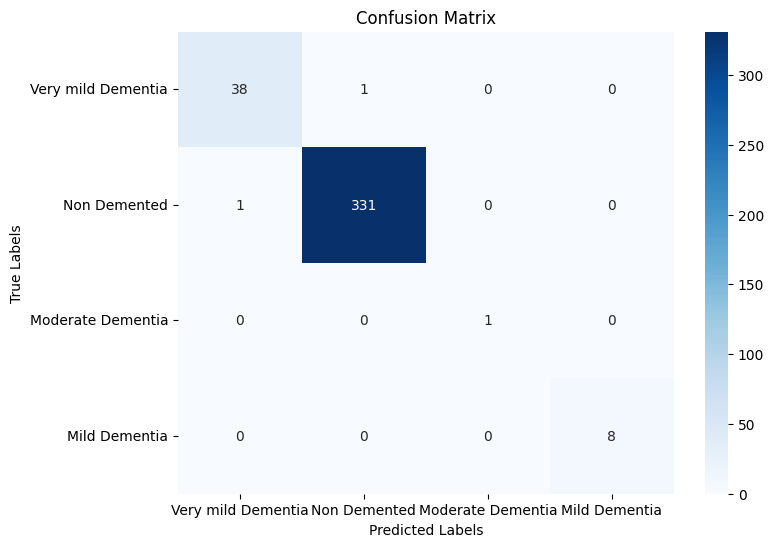

In [12]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load the saved model
model = tf.keras.models.load_model('alzheimers_InceptionResnetV2.h5')

# Prepare the test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
test_dataset = test_dataset.map(load_and_preprocess_image)
test_dataset = test_dataset.batch(batch_size)

# Make predictions on the test dataset
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the classification report
target_names = ['Very mild Dementia', 'Non Demented', 'Moderate Dementia', 'Mild Dementia']
report = classification_report(val_labels, y_pred_classes, target_names=target_names)

print(report)

# Compute the confusion matrix
conf_mat = confusion_matrix(val_labels, y_pred_classes)

# Create a DataFrame from the confusion matrix
conf_mat_df = pd.DataFrame(conf_mat, index=target_names, columns=target_names)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [16]:
# os.listdir(r'C:\Users\praya\Downloads\archive\Alzheimers\Mild Dementia')
len(file_paths)

1897